# TERM-FREQUENCY

In [6]:
import pandas as pd 
corpus = pd.read_excel('rappler_corpus.xlsx')
print(corpus.shape)

(49, 4)


Preprocessing Step

In [2]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('stopwords') 
nltk.download('wordnet') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Noah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Noah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
basic_stopwords = ['a', 'am', 'and'] 
custom_stopwords = ['alice', 'guo'] 

In [4]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess_text(df, text_column='text'): 
    ''' preprocess text by lowercasing, stemming/lemmatizing '''

    # lowercase
    df['cleaned_text'] = df[text_column].str.lower() 

    # lemmatizer 
    # df['cleaned_text'] = df['cleaned_text'].apply(
    #     lambda text: ' '.join([
    #         lemmatizer.lemmatize(word, 'n') for word in text.split() 
    #     ])
    # )

    # stemmer
    df['cleaned_text'] = df['cleaned_text'].apply(
        lambda text: ' '.join([
            stemmer.stem(word) for word in text.split() 
        ])
    )

    # remove stopwords
    df['cleaned_text'] = df['cleaned_text'].apply(
        lambda text: ' '.join([
            word for word in text.split() if word not in stopwords.words('english')
        ])
    )

    df['cleaned_text'] = df['cleaned_text'].apply(
        lambda text: ' '.join([
            word for word in text.split() if word not in basic_stopwords
        ])
    )

    df['cleaned_text'] = df['cleaned_text'].apply(
        lambda text: ' '.join([
            word for word in text.split() if word not in custom_stopwords
        ])
    )

    return df 

In [9]:
corpus = preprocess_text(corpus, text_column='text')

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,1))
matrix = vectorizer.fit_transform(corpus['cleaned_text'])
doc2vec = pd.DataFrame(matrix.toarray())

# better readability 
doc2vec.columns = vectorizer.get_feature_names_out()
doc2vec.head()

,000,04,09,10,100,11,117,11959,1197,11983,...,zhang,zhao,zhengcan,zhijiang,zhiyang,zhong,zia,zone,zones,zun
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


CBOW

In [14]:
def top_n_grams(document, n=10): 
    return document.sort_values(ascending=False).index[:n].tolist()

In [16]:
most_frequent_terms_bow = doc2vec.apply(lambda document: 
                                        top_n_grams(document, n=5), 
                                        axis=1,)

TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(ngram_range=(1,1))
tfidfmatrix = tfidfvectorizer.fit_transform(corpus['cleaned_text'])

doc2tfidf = pd.DataFrame(
    tfidfmatrix.toarray(), 
    columns=tfidfvectorizer.get_feature_names_out(),
    )

most_frequent_terms_tfidf = doc2tfidf.apply(lambda document: 
                                      top_n_grams(document, n=5), 
                                      axis=1,)

## STATIC EMBEDDING

In [28]:
import gensim

In [69]:
corpus['tokenized'] = corpus['cleaned_text'].apply(
    lambda text: [word for word in text.split()]
    )
model = gensim.models.Word2Vec(corpus['tokenized'], 
                               vector_size=150,
                               min_count=2, 
                               sg=0,
                               window=5, 
                               workers=4, 
                               epochs=10,)
model.save('initial_model.model')


In [70]:
vectors = model.wv
len(vectors)

2578

In [71]:
vectors.index_to_key[:5]

['wa', 'said', 'pogo', 'philippin', 'game']

In [72]:
vectors['manila']

array([ 9.36501659e-03, -6.70035705e-02, -1.38241068e-01,  3.57061997e-02,
        3.16103958e-02, -1.31159127e-01, -7.32315704e-02,  4.31566387e-01,
       -8.24652333e-03,  1.09128915e-01,  8.57544467e-02,  2.70641558e-02,
       -2.14029476e-01,  1.52771503e-01, -1.90547481e-01, -1.44094452e-01,
        1.45216033e-01, -1.08758613e-01,  7.59076849e-02,  1.61128134e-01,
       -2.23265499e-01,  4.65064682e-03,  1.80341274e-01,  9.46553946e-02,
        1.96718916e-01,  3.30031104e-02, -2.83150524e-01, -1.53428257e-01,
       -7.00055733e-02, -3.27128232e-01,  5.54838777e-03, -3.61143192e-03,
       -2.64255833e-02, -1.54611260e-01, -8.16350356e-02,  7.86839053e-02,
        2.64674515e-01,  1.21125886e-02,  1.14776857e-01, -8.97906274e-02,
       -7.18225390e-02,  5.46984933e-02, -1.64900005e-01, -1.93964422e-01,
        1.31051034e-01,  2.99860239e-02,  4.45013866e-02, -4.63954583e-02,
        9.50580910e-02,  1.86823085e-01, -1.08705737e-01,  1.59671545e-01,
       -1.50613427e-01, -

In [74]:
vectors.similarity('manila', 'philippin') 
vectors.most_similar('philippin', topn=5)

[('game', 0.9997929334640503),
 ('oper', 0.9997773170471191),
 ('ban', 0.9996817111968994),
 ('pogo', 0.9996618032455444),
 ('corpor', 0.9996564388275146)]

In [75]:
vectors.most_similar(positive=['manila'], negative=['philippin'], topn=5)

[('gadget', 0.04686755686998367),
 ('police’', 0.04579053446650505),
 ('16', 0.04013141244649887),
 ('mind', 0.03895144909620285),
 ('inde', 0.0385131798684597)]

In [76]:
import seaborn as sns 
import matplotlib as plt 
from sklearn.decomposition import PCA

In [92]:
word_set1 = [
    vectors.most_similar('pogo', topn=5)[idx][0] for idx in range(5) 
]
word_set2 = [
    vectors.most_similar('roqu', topn=5)[idx][0] for idx in range(5) 
]

In [93]:
words_to_visualization = word_set1 + word_set2
vectors_to_visualization = [
    vectors[word] for word in words_to_visualization
]

In [84]:
pca = PCA(n_components=2) 
vectors_2dspace = pca.fit_transform(vectors_to_visualization)

In [94]:
vectors_PCA_df = pd.DataFrame(
    columns=['word', 'association_value', 'PCA1', 'PCA2']
)

for index in range(len(words_to_visualization)): 
    word = words_to_visualization[index]
    association = 'pogo' if word in word_set1 else 'roqu'
    PCA1 = vectors_2dspace[index][0] 
    PCA2 = vectors_2dspace[index][1] 

    newrow = ['word', 'association', 'PCA1', 'PCA2']

    vectors_PCA_df.loc[index] = newrow 

In [87]:
words_to_visualization[0]

'wa'

TypeError: unsupported operand type(s) for -: 'str' and 'float'

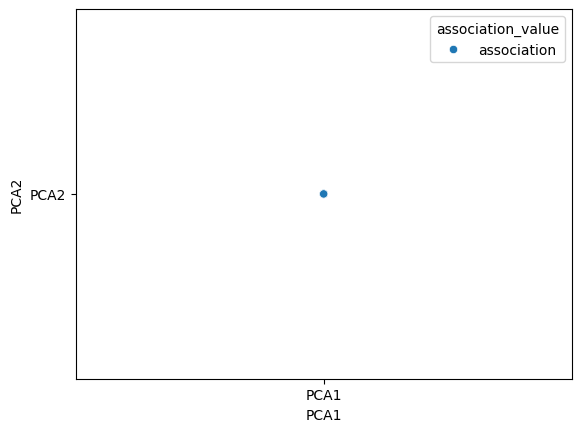

In [97]:
vectors_visualization = sns.scatterplot(
    data=vectors_PCA_df, 
    x='PCA1', 
    y='PCA2', 
    hue='association_value', 
)

for index in range(len(vectors_PCA_df)): 
    vectors_visualization.text(
        vectors_PCA_df.PCA1[index]-0.01,
        vectors_PCA_df.PCA2[index], 
        vectors_PCA_df.word[index],
        horizontalalignment='center',  
    )